### This project aims to generate a Deep learning algorithm model to predict the name of sports by image.

In [ ]:
# let's import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt

### Extract the zip file.

In [ ]:
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "Sports classification.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

### train, validation, and test directories

In [3]:
# specify the train, validation, and test directories.
train_dir = 'train'
test_dir = 'test'
valid_dir = 'valid'

In [4]:
#import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### spliting the data into train, test, and validation

In [5]:
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)
valid_data_gen = ImageDataGenerator(rescale=1/255.)
train_data = train_data_gen.flow_from_directory(train_dir,
                                               target_size=(224,224)
                                              
                                              )

test_data = train_data_gen.flow_from_directory(test_dir,
                                              target_size=(224,224)
                                              )

valid_data = train_data_gen.flow_from_directory(valid_dir,
                                               target_size=(224,224)
                                              
                                              )                                              

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


### Importing tensorflow Hub and use efficientnetB0

In [9]:
import tensorflow_hub as hub


In [10]:
from tensorflow.keras import regularizers


In [11]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [12]:
# adding the deep learning model from efficientnetnetB0 to our model,
feature_extract_layer = hub.KerasLayer(efficientnet_url, trainable = False, 
                                       name='feature_extraction_layer',
                                           input_shape = (224,224,3),
                                       )
# adding the layer for 100 sports as a output
model_1 = tf.keras.Sequential([
    feature_extract_layer,
    tf.keras.layers.Dense(100, activation= 'softmax', name='output_layer') # activiation for multiclass classification is softmax
])
# compile the model
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# fit the model
Inception_history = model_1.fit(train_data,
                                  epochs=20,
                                  steps_per_epoch=len(train_data),
                                  validation_data=valid_data,
                                  validation_steps=len(valid_data)
                                 )

Epoch 1/20
425/425 [==============================] - 300s 679ms/step - loss: 1.1964 - accuracy: 0.7822 - val_loss: 0.3477 - val_accuracy: 0.9480
Epoch 2/20
425/425 [==============================] - 270s 634ms/step - loss: 0.2872 - accuracy: 0.9474 - val_loss: 0.2141 - val_accuracy: 0.9620
Epoch 3/20
425/425 [==============================] - 272s 640ms/step - loss: 0.1668 - accuracy: 0.9741 - val_loss: 0.1680 - val_accuracy: 0.9700
Epoch 4/20
425/425 [==============================] - 273s 642ms/step - loss: 0.1100 - accuracy: 0.9860 - val_loss: 0.1422 - val_accuracy: 0.9620
Epoch 5/20
425/425 [==============================] - 271s 637ms/step - loss: 0.0775 - accuracy: 0.9924 - val_loss: 0.1279 - val_accuracy: 0.9680
Epoch 6/20
425/425 [==============================] - 274s 645ms/step - loss: 0.0565 - accuracy: 0.9952 - val_loss: 0.1150 - val_accuracy: 0.9740
Epoch 7/20
425/425 [==============================] - 270s 636ms/step - loss: 0.0427 - accuracy: 0.9974 - val_loss: 0.1129 -

### plot the history function to study loss and accuracy.

<AxesSubplot:>

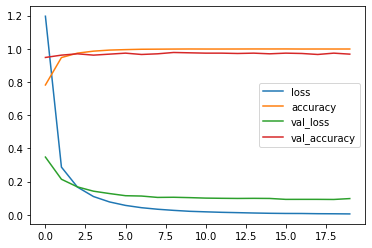

In [13]:
pd.DataFrame(Inception_history.history).plot()

### it's a good result. The accuracy of the model is increasing the loss is decreasing for both validation and training data sets.

In [14]:
#now let's evaluate the model.
model_1.evaluate(test_data)

16/16 [==============================] - 10s 607ms/step - loss: 0.0703 - accuracy: 0.9720


[0.0702577754855156, 0.972000002861023]

### 97% accuracy is a great value for the model.

#### in this section, I will use a couple functions that made by Daniel Bourke to load, process, predict, and plot for each input variable to the model.
Reference to Daniel's functions is this Github address ==> https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb

In [15]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [16]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['air hockey' 'ampute football' 'archery' 'arm wrestling' 'axe throwing'
 'balance beam' 'barell racing' 'baseball' 'basketball' 'baton twirling'
 'bike polo' 'billiards' 'bmx' 'bobsled' 'bowling' 'boxing' 'bull riding'
 'bungee jumping' 'canoe slamon' 'cheerleading' 'chuckwagon racing'
 'cricket' 'croquet' 'curling' 'disc golf' 'fencing' 'field hockey'
 'figure skating men' 'figure skating pairs' 'figure skating women'
 'fly fishing' 'football' 'formula 1 racing' 'frisbee' 'gaga'
 'giant slalom' 'golf' 'hammer throw' 'hang gliding' 'harness racing'
 'high jump' 'hockey' 'horse jumping' 'horse racing' 'horseshoe pitching'
 'hurdles' 'hydroplane racing' 'ice climbing' 'ice yachting' 'jai alai'
 'javelin' 'jousting' 'judo' 'lacrosse' 'log rolling' 'luge'
 'motorcycle racing' 'mushing' 'nascar racing' 'olympic wrestling'
 'parallel bar' 'pole climbing' 'pole dancing' 'pole vault' 'polo'
 'pommel horse' 'rings' 'rock climbing' 'roller derby'
 'rollerblade racing' 'rowing' 'rugby' 'sailboat

In [17]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

### I have downloaded an image from the net, and feed it to the model and get the result.

1/1 [==============================] - 1s 801ms/step


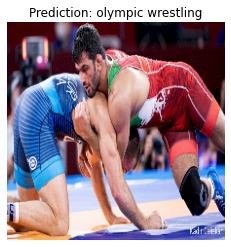

In [18]:
pred_and_plot(model_1, 'we.jpeg', class_names)

### you can see that the machine learning algorithm predict the olympic wrestling very well.